In [1]:
#install necessary packages
!pip install scikit-multilearn

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#imports
import os
from datetime import datetime
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from torch.utils.data import DataLoader, ConcatDataset

In [4]:
#get correct directory
os.chdir('/content/drive/MyDrive/Love Hackathon')

In [5]:
#from .py
from utils import *

In [6]:
#get datasets
X, y, X_train, X_test, y_train, y_test = get_dataset()

## Sklearn

In [7]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.semi_supervised import LabelSpreading

dt_clf = DecisionTreeClassifier(random_state=0)
et_clf = ExtraTreeClassifier(random_state=0)
ets_clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
knn_clf = KNeighborsClassifier(n_neighbors=16)
mlp1_clf = MLPClassifier(hidden_layer_sizes=(80,54,12), activation = 'identity',solver='adam', alpha=0.05, learning_rate='constant' ,random_state=1, max_iter=5000)
mlp_clf = MLPClassifier(hidden_layer_sizes=(54,48), activation = 'identity',solver='adam', random_state=1, max_iter=5000)
rdm_f_clf = RandomForestClassifier(n_estimators=1, criterion='entropy', random_state=12)

svm = SVC(C=1.8, kernel="rbf",probability=True)
svm_clf = MultiOutputClassifier(svm, n_jobs=-1)

clf1_1 = BinaryRelevance(GaussianNB())
clf1_2 = BinaryRelevance(LogisticRegression())
clf1_3 = BinaryRelevance(RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]))
clf1_4 = BinaryRelevance(RidgeClassifier())
clf1_5 = BinaryRelevance(RadiusNeighborsClassifier(radius=10.0))
clf1_6 = BinaryRelevance(QuadraticDiscriminantAnalysis())
clf1_7 = BinaryRelevance(NearestCentroid())
clf1_8 = BinaryRelevance(LogisticRegressionCV(cv=5, random_state=0))
clf1_9 = BinaryRelevance(make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5)))
clf1_10 = BinaryRelevance(LinearDiscriminantAnalysis())

clf2_1 = ClassifierChain(GaussianNB())
clf2_2 = ClassifierChain(LogisticRegression())
clf2_3 = ClassifierChain(RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]))
clf2_4 = ClassifierChain(RidgeClassifier())
clf2_5 = ClassifierChain(RadiusNeighborsClassifier(radius=10.0))
clf2_6 = ClassifierChain(QuadraticDiscriminantAnalysis())
clf2_7 = ClassifierChain(NearestCentroid())
clf2_8 = ClassifierChain(LogisticRegressionCV(cv=5, random_state=0))
clf2_9 = ClassifierChain(make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5)))
clf2_10 = ClassifierChain(LinearDiscriminantAnalysis())

clf3_1 = LabelPowerset(GaussianNB())
clf3_2 = LabelPowerset(LogisticRegression())
clf3_3 = LabelPowerset(RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]))
clf3_4 = LabelPowerset(RidgeClassifier())
clf3_5 = LabelPowerset(RadiusNeighborsClassifier(radius=10.0))
clf3_6 = LabelPowerset(QuadraticDiscriminantAnalysis())
clf3_7 = LabelPowerset(NearestCentroid())
clf3_8 = LabelPowerset(LogisticRegressionCV(cv=5, random_state=0))
clf3_9 = LabelPowerset(make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5)))
clf3_10 = LabelPowerset(LinearDiscriminantAnalysis())

In [8]:
# models = [mlp_clf, mlp1_clf, svm_clf, dt_clf, et_clf, ets_clf, knn_clf, rdm_f_clf,
#           clf1_1,clf1_2,clf1_3,clf1_4,clf1_5,clf1_6,clf1_7,clf1_8,clf1_9,clf1_10,
#           clf2_1,clf2_2,clf2_3,clf2_4,clf2_5,clf2_6,clf2_7,clf2_8,clf2_9,clf2_10,
#           clf3_1,clf3_2,clf3_3,clf3_4,clf3_5,clf3_6,clf3_7,clf3_8,clf3_9,clf3_10]

# score_df, best_model, best_f1_macro_mean = cross_validate_models(models, X, y)


# Deep Learning

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)

In [10]:
#apply PCA if necessary, in this case no
# pca = PCA(n_components=28)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

In [11]:
#convert dataset into tensor form
class Datasets(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels.values, dtype  = torch.float32)

    def __len__(self):
        return self.features.shape[0]
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = Datasets(X_train, y_train)
test_dataset = Datasets(X_test, y_test)
dataset = ConcatDataset([train_dataset, test_dataset])

train_loader = DataLoader(train_dataset, batch_size = 128)
test_loader = DataLoader(test_dataset, batch_size = 128 )

In [12]:
#declare models 
model1 = declare_model(X_train.shape[1], 20, y_train.shape[1])
model2 = declare_model(X_train.shape[1], 20, y_train.shape[1])
model3 = declare_model(X_train.shape[1], 20, y_train.shape[1])

Epoch 100, train_loss: 0.5477, train_acc:0.4422, test_loss:0.5450, test_acc:0.4487, train_top_acc:0.5248, test_top_acc:0.3462
Epoch 200, train_loss: 0.5162, train_acc:0.4422, test_loss:0.5276, test_acc:0.3846, train_top_acc:0.5842, test_top_acc:0.3846
Epoch 300, train_loss: 0.5053, train_acc:0.4554, test_loss:0.5260, test_acc:0.3846, train_top_acc:0.6238, test_top_acc:0.4615
Epoch 400, train_loss: 0.4990, train_acc:0.4554, test_loss:0.5256, test_acc:0.3846, train_top_acc:0.6634, test_top_acc:0.4615
Epoch 500, train_loss: 0.4922, train_acc:0.4686, test_loss:0.5254, test_acc:0.4103, train_top_acc:0.6832, test_top_acc:0.5000
Epoch 600, train_loss: 0.4824, train_acc:0.5083, test_loss:0.5270, test_acc:0.4103, train_top_acc:0.7723, test_top_acc:0.4615
Epoch 700, train_loss: 0.4782, train_acc:0.5248, test_loss:0.5301, test_acc:0.3974, train_top_acc:0.7228, test_top_acc:0.4615
Epoch 800, train_loss: 0.4700, train_acc:0.5479, test_loss:0.5328, test_acc:0.3718, train_top_acc:0.8119, test_top_acc

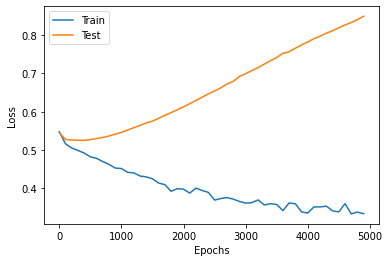

In [13]:
train_model(train_dataset, test_dataset, model1, nn.BCEWithLogitsLoss())

Epoch 100, train_loss: 0.5389, train_acc:0.3993, test_loss:0.5335, test_acc:0.3846, train_top_acc:0.4059, test_top_acc:0.3846
Epoch 200, train_loss: 0.5129, train_acc:0.4488, test_loss:0.5249, test_acc:0.3846, train_top_acc:0.5050, test_top_acc:0.4231
Epoch 300, train_loss: 0.5030, train_acc:0.4554, test_loss:0.5253, test_acc:0.3846, train_top_acc:0.5446, test_top_acc:0.3846
Epoch 400, train_loss: 0.4969, train_acc:0.4818, test_loss:0.5240, test_acc:0.4103, train_top_acc:0.6931, test_top_acc:0.4615
Epoch 500, train_loss: 0.4900, train_acc:0.5017, test_loss:0.5242, test_acc:0.4103, train_top_acc:0.6634, test_top_acc:0.4615
Epoch 600, train_loss: 0.4753, train_acc:0.5083, test_loss:0.5267, test_acc:0.3974, train_top_acc:0.7723, test_top_acc:0.4231
Epoch 700, train_loss: 0.4668, train_acc:0.5413, test_loss:0.5298, test_acc:0.3974, train_top_acc:0.7426, test_top_acc:0.4231
Epoch 800, train_loss: 0.4639, train_acc:0.5578, test_loss:0.5341, test_acc:0.3846, train_top_acc:0.7129, test_top_acc

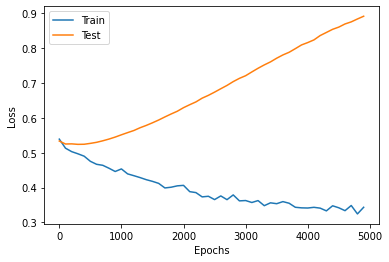

In [14]:
train_model(train_dataset, test_dataset, model2, nn.MultiLabelSoftMarginLoss())

In [15]:
get_confusion_matrix_yc(test_loader, train_loader, model1)

-------------------------------Test------------------------
Confusion Matrix
 [[175  59]
 [ 44  34]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.36      0.40      0.38        10
           2       0.33      0.50      0.40         6
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         3
           5       0.56      0.36      0.43        14
           6       0.55      0.60      0.57        10
           7       0.38      1.00      0.55         3
           8       0.22      0.29      0.25         7
           9       0.00      0.00      0.00         2
          10       0.42      0.56      0.48         9
          11       0.38      0.71      0.50         7

   micro avg       0.37      0.44      0.40        78
   macro avg       0.28      0.39      0.32        78
weighted avg       0.37      0.44      0.39        78
 samples avg       0.38      0.44

In [20]:
get_confusion_matrix_alvin(test_loader, train_loader, model1)

-------------------------------Test------------------------
Confusion Matrix
 [[185  49]
 [ 49  29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.30      0.32        10
           2       0.25      0.33      0.29         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.56      0.36      0.43        14
           6       0.55      0.60      0.57        10
           7       0.29      0.67      0.40         3
           8       0.25      0.29      0.27         7
           9       0.00      0.00      0.00         2
          10       0.45      0.56      0.50         9
          11       0.40      0.57      0.47         7

   micro avg       0.37      0.37      0.37        78
   macro avg       0.26      0.31      0.27        78
weighted avg       0.35      0.37      0.35        78
 samples avg       0.37      0.37

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
get_confusion_matrix_yc(test_loader, train_loader, model2)

-------------------------------Test------------------------
Confusion Matrix
 [[177  57]
 [ 50  28]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.20      0.29        10
           2       0.30      0.50      0.37         6
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         3
           5       0.57      0.29      0.38        14
           6       0.55      0.60      0.57        10
           7       0.25      0.33      0.29         3
           8       0.20      0.29      0.24         7
           9       0.00      0.00      0.00         2
          10       0.42      0.56      0.48         9
          11       0.31      0.57      0.40         7

   micro avg       0.33      0.36      0.34        78
   macro avg       0.27      0.30      0.27        78
weighted avg       0.37      0.36      0.34        78
 samples avg       0.38      0.36

In [22]:
get_confusion_matrix_alvin(test_loader, train_loader, model2)

-------------------------------Test------------------------
Confusion Matrix
 [[181  53]
 [ 53  25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.20      0.31        10
           2       0.30      0.50      0.37         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.50      0.21      0.30        14
           6       0.55      0.60      0.57        10
           7       0.00      0.00      0.00         3
           8       0.18      0.29      0.22         7
           9       0.00      0.00      0.00         2
          10       0.38      0.56      0.45         9
          11       0.40      0.57      0.47         7

   micro avg       0.32      0.32      0.32        78
   macro avg       0.25      0.24      0.23        78
weighted avg       0.36      0.32      0.31        78
 samples avg       0.32      0.32